# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

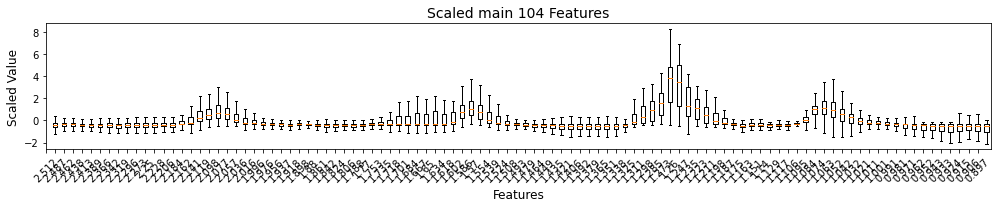

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

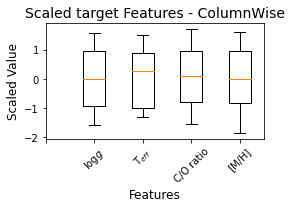

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

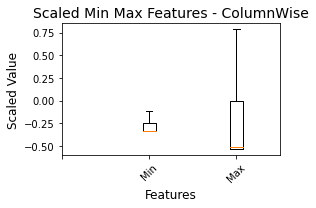

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:59 - loss: 1.8720 - gravity_loss: 0.4715 - c_o_ratio_loss: 0.4721 - metallicity_loss: 0.4598 - temperature_loss: 0.4686 - gravity_mae: 0.8764 - c_o_ratio_mae: 0.8944 - metallicity_mae: 0.8583 - temperature_mae: 0.8745

 2/13 [===>..........................] - ETA: 1:11 - loss: 1.8406 - gravity_loss: 0.4623 - c_o_ratio_loss: 0.4671 - metallicity_loss: 0.4543 - temperature_loss: 0.4569 - gravity_mae: 0.8628 - c_o_ratio_mae: 0.8886 - metallicity_mae: 0.8494 - temperature_mae: 0.8603

 3/13 [=====>........................] - ETA: 1:03 - loss: 1.8233 - gravity_loss: 0.4662 - c_o_ratio_loss: 0.4661 - metallicity_loss: 0.4454 - temperature_loss: 0.4455 - gravity_mae: 0.8688 - c_o_ratio_mae: 0.8870 - metallicity_mae: 0.8376 - temperature_mae: 0.8450

 4/13 [========>.....................] - ETA: 56s - loss: 1.7835 - gravity_loss: 0.4633 - c_o_ratio_loss: 0.4656 - metallicity_loss: 0.4406 - temperature_loss: 0.4141 - gravity_mae: 0.8645 - c_o_ratio_mae: 0.8860 - metallicity_mae: 0.8330 - temperature_mae: 0.8060 

 5/13 [==========>...................] - ETA: 50s - loss: 1.7333 - gravity_loss: 0.4615 - c_o_ratio_loss: 0.4596 - metallicity_loss: 0.4384 - temperature_loss: 0.3737 - gravity_mae: 0.8635 - c_o_ratio_mae: 0.8787 - metallicity_mae: 0.8311 - temperature_mae: 0.7492

 6/13 [============>.................] - ETA: 46s - loss: 1.6740 - gravity_loss: 0.4579 - c_o_ratio_loss: 0.4550 - metallicity_loss: 0.4318 - temperature_loss: 0.3293 - gravity_mae: 0.8591 - c_o_ratio_mae: 0.8732 - metallicity_mae: 0.8232 - temperature_mae: 0.6810

 7/13 [===============>..............] - ETA: 40s - loss: 1.6282 - gravity_loss: 0.4536 - c_o_ratio_loss: 0.4492 - metallicity_loss: 0.4188 - temperature_loss: 0.3066 - gravity_mae: 0.8542 - c_o_ratio_mae: 0.8660 - metallicity_mae: 0.8074 - temperature_mae: 0.6551

 8/13 [=================>............] - ETA: 34s - loss: 1.5912 - gravity_loss: 0.4486 - c_o_ratio_loss: 0.4420 - metallicity_loss: 0.4016 - temperature_loss: 0.2990 - gravity_mae: 0.8480 - c_o_ratio_mae: 0.8570 - metallicity_mae: 0.7863 - temperature_mae: 0.6517

 9/13 [===================>..........] - ETA: 28s - loss: 1.5466 - gravity_loss: 0.4429 - c_o_ratio_loss: 0.4318 - metallicity_loss: 0.3848 - temperature_loss: 0.2872 - gravity_mae: 0.8410 - c_o_ratio_mae: 0.8439 - metallicity_mae: 0.7646 - temperature_mae: 0.6407

10/13 [======================>.......] - ETA: 22s - loss: 1.5007 - gravity_loss: 0.4369 - c_o_ratio_loss: 0.4235 - metallicity_loss: 0.3707 - temperature_loss: 0.2696 - gravity_mae: 0.8338 - c_o_ratio_mae: 0.8339 - metallicity_mae: 0.7461 - temperature_mae: 0.6165

11/13 [========================>.....] - ETA: 15s - loss: 1.4596 - gravity_loss: 0.4314 - c_o_ratio_loss: 0.4147 - metallicity_loss: 0.3585 - temperature_loss: 0.2550 - gravity_mae: 0.8272 - c_o_ratio_mae: 0.8223 - metallicity_mae: 0.7299 - temperature_mae: 0.5930

12/13 [==========================>...] - ETA: 7s - loss: 1.4273 - gravity_loss: 0.4267 - c_o_ratio_loss: 0.4047 - metallicity_loss: 0.3485 - temperature_loss: 0.2475 - gravity_mae: 0.8212 - c_o_ratio_mae: 0.8082 - metallicity_mae: 0.7163 - temperature_mae: 0.5820 

13/13 [==============================] - ETA: 0s - loss: 1.4195 - gravity_loss: 0.4259 - c_o_ratio_loss: 0.4022 - metallicity_loss: 0.3463 - temperature_loss: 0.2451 - gravity_mae: 0.8201 - c_o_ratio_mae: 0.8047 - metallicity_mae: 0.7132 - temperature_mae: 0.5782

13/13 [==============================] - 104s 8s/step - loss: 1.4195 - gravity_loss: 0.4259 - c_o_ratio_loss: 0.4022 - metallicity_loss: 0.3463 - temperature_loss: 0.2451 - gravity_mae: 0.8201 - c_o_ratio_mae: 0.8047 - metallicity_mae: 0.7132 - temperature_mae: 0.5782 - val_loss: 0.8778 - val_gravity_loss: 0.3536 - val_c_o_ratio_loss: 0.2496 - val_metallicity_loss: 0.2268 - val_temperature_loss: 0.0478 - val_gravity_mae: 0.7266 - val_c_o_ratio_mae: 0.5840 - val_metallicity_mae: 0.5556 - val_temperature_mae: 0.2516


Epoch 2/4


 1/13 [=>............................] - ETA: 1:40 - loss: 0.8982 - gravity_loss: 0.3579 - c_o_ratio_loss: 0.2612 - metallicity_loss: 0.2189 - temperature_loss: 0.0603 - gravity_mae: 0.7330 - c_o_ratio_mae: 0.5972 - metallicity_mae: 0.5443 - temperature_mae: 0.2920

 2/13 [===>..........................] - ETA: 1:35 - loss: 0.9097 - gravity_loss: 0.3604 - c_o_ratio_loss: 0.2615 - metallicity_loss: 0.2103 - temperature_loss: 0.0774 - gravity_mae: 0.7367 - c_o_ratio_mae: 0.5953 - metallicity_mae: 0.5339 - temperature_mae: 0.3287

 3/13 [=====>........................] - ETA: 1:31 - loss: 0.8845 - gravity_loss: 0.3508 - c_o_ratio_loss: 0.2528 - metallicity_loss: 0.2052 - temperature_loss: 0.0758 - gravity_mae: 0.7236 - c_o_ratio_mae: 0.5860 - metallicity_mae: 0.5245 - temperature_mae: 0.3253

 4/13 [========>.....................] - ETA: 1:21 - loss: 0.8658 - gravity_loss: 0.3475 - c_o_ratio_loss: 0.2495 - metallicity_loss: 0.2050 - temperature_loss: 0.0637 - gravity_mae: 0.7198 - c_o_ratio_mae: 0.5843 - metallicity_mae: 0.5239 - temperature_mae: 0.2882

 5/13 [==========>...................] - ETA: 1:10 - loss: 0.8569 - gravity_loss: 0.3485 - c_o_ratio_loss: 0.2447 - metallicity_loss: 0.2045 - temperature_loss: 0.0591 - gravity_mae: 0.7210 - c_o_ratio_mae: 0.5782 - metallicity_mae: 0.5239 - temperature_mae: 0.2771

 6/13 [============>.................] - ETA: 1:00 - loss: 0.8521 - gravity_loss: 0.3497 - c_o_ratio_loss: 0.2391 - metallicity_loss: 0.2055 - temperature_loss: 0.0579 - gravity_mae: 0.7229 - c_o_ratio_mae: 0.5713 - metallicity_mae: 0.5265 - temperature_mae: 0.2755

 7/13 [===============>..............] - ETA: 50s - loss: 0.8383 - gravity_loss: 0.3473 - c_o_ratio_loss: 0.2338 - metallicity_loss: 0.2033 - temperature_loss: 0.0539 - gravity_mae: 0.7205 - c_o_ratio_mae: 0.5633 - metallicity_mae: 0.5234 - temperature_mae: 0.2637 

 8/13 [=================>............] - ETA: 41s - loss: 0.8277 - gravity_loss: 0.3453 - c_o_ratio_loss: 0.2290 - metallicity_loss: 0.2021 - temperature_loss: 0.0513 - gravity_mae: 0.7172 - c_o_ratio_mae: 0.5560 - metallicity_mae: 0.5217 - temperature_mae: 0.2562

 9/13 [===================>..........] - ETA: 32s - loss: 0.8186 - gravity_loss: 0.3437 - c_o_ratio_loss: 0.2220 - metallicity_loss: 0.2020 - temperature_loss: 0.0510 - gravity_mae: 0.7147 - c_o_ratio_mae: 0.5457 - metallicity_mae: 0.5217 - temperature_mae: 0.2562

10/13 [======================>.......] - ETA: 24s - loss: 0.8068 - gravity_loss: 0.3420 - c_o_ratio_loss: 0.2159 - metallicity_loss: 0.1998 - temperature_loss: 0.0491 - gravity_mae: 0.7117 - c_o_ratio_mae: 0.5366 - metallicity_mae: 0.5185 - temperature_mae: 0.2506

11/13 [========================>.....] - ETA: 16s - loss: 0.7981 - gravity_loss: 0.3402 - c_o_ratio_loss: 0.2115 - metallicity_loss: 0.1998 - temperature_loss: 0.0466 - gravity_mae: 0.7093 - c_o_ratio_mae: 0.5294 - metallicity_mae: 0.5179 - temperature_mae: 0.2425

12/13 [==========================>...] - ETA: 7s - loss: 0.7899 - gravity_loss: 0.3389 - c_o_ratio_loss: 0.2068 - metallicity_loss: 0.1988 - temperature_loss: 0.0455 - gravity_mae: 0.7074 - c_o_ratio_mae: 0.5224 - metallicity_mae: 0.5162 - temperature_mae: 0.2394 

13/13 [==============================] - ETA: 0s - loss: 0.7883 - gravity_loss: 0.3386 - c_o_ratio_loss: 0.2058 - metallicity_loss: 0.1985 - temperature_loss: 0.0454 - gravity_mae: 0.7072 - c_o_ratio_mae: 0.5209 - metallicity_mae: 0.5159 - temperature_mae: 0.2390

13/13 [==============================] - 101s 8s/step - loss: 0.7883 - gravity_loss: 0.3386 - c_o_ratio_loss: 0.2058 - metallicity_loss: 0.1985 - temperature_loss: 0.0454 - gravity_mae: 0.7072 - c_o_ratio_mae: 0.5209 - metallicity_mae: 0.5159 - temperature_mae: 0.2390 - val_loss: 0.6234 - val_gravity_loss: 0.3071 - val_c_o_ratio_loss: 0.1239 - val_metallicity_loss: 0.1716 - val_temperature_loss: 0.0208 - val_gravity_mae: 0.6631 - val_c_o_ratio_mae: 0.3828 - val_metallicity_mae: 0.4737 - val_temperature_mae: 0.1581


Epoch 3/4


 1/13 [=>............................] - ETA: 1:12 - loss: 0.6303 - gravity_loss: 0.3071 - c_o_ratio_loss: 0.1245 - metallicity_loss: 0.1700 - temperature_loss: 0.0288 - gravity_mae: 0.6672 - c_o_ratio_mae: 0.3874 - metallicity_mae: 0.4778 - temperature_mae: 0.1844

 2/13 [===>..........................] - ETA: 1:06 - loss: 0.6524 - gravity_loss: 0.3201 - c_o_ratio_loss: 0.1247 - metallicity_loss: 0.1793 - temperature_loss: 0.0284 - gravity_mae: 0.6798 - c_o_ratio_mae: 0.3905 - metallicity_mae: 0.4873 - temperature_mae: 0.1858

 3/13 [=====>........................] - ETA: 1:00 - loss: 0.6452 - gravity_loss: 0.3158 - c_o_ratio_loss: 0.1243 - metallicity_loss: 0.1766 - temperature_loss: 0.0284 - gravity_mae: 0.6728 - c_o_ratio_mae: 0.3883 - metallicity_mae: 0.4822 - temperature_mae: 0.1859

 4/13 [========>.....................] - ETA: 54s - loss: 0.6430 - gravity_loss: 0.3161 - c_o_ratio_loss: 0.1221 - metallicity_loss: 0.1773 - temperature_loss: 0.0276 - gravity_mae: 0.6738 - c_o_ratio_mae: 0.3836 - metallicity_mae: 0.4845 - temperature_mae: 0.1833 

 5/13 [==========>...................] - ETA: 50s - loss: 0.6328 - gravity_loss: 0.3147 - c_o_ratio_loss: 0.1174 - metallicity_loss: 0.1750 - temperature_loss: 0.0258 - gravity_mae: 0.6716 - c_o_ratio_mae: 0.3752 - metallicity_mae: 0.4812 - temperature_mae: 0.1765

 6/13 [============>.................] - ETA: 44s - loss: 0.6278 - gravity_loss: 0.3124 - c_o_ratio_loss: 0.1147 - metallicity_loss: 0.1758 - temperature_loss: 0.0250 - gravity_mae: 0.6698 - c_o_ratio_mae: 0.3716 - metallicity_mae: 0.4807 - temperature_mae: 0.1736

 7/13 [===============>..............] - ETA: 37s - loss: 0.6239 - gravity_loss: 0.3117 - c_o_ratio_loss: 0.1116 - metallicity_loss: 0.1759 - temperature_loss: 0.0246 - gravity_mae: 0.6694 - c_o_ratio_mae: 0.3664 - metallicity_mae: 0.4806 - temperature_mae: 0.1731

 8/13 [=================>............] - ETA: 31s - loss: 0.6208 - gravity_loss: 0.3118 - c_o_ratio_loss: 0.1101 - metallicity_loss: 0.1752 - temperature_loss: 0.0238 - gravity_mae: 0.6697 - c_o_ratio_mae: 0.3643 - metallicity_mae: 0.4802 - temperature_mae: 0.1699

 9/13 [===================>..........] - ETA: 25s - loss: 0.6160 - gravity_loss: 0.3107 - c_o_ratio_loss: 0.1085 - metallicity_loss: 0.1739 - temperature_loss: 0.0228 - gravity_mae: 0.6681 - c_o_ratio_mae: 0.3622 - metallicity_mae: 0.4781 - temperature_mae: 0.1661

10/13 [======================>.......] - ETA: 19s - loss: 0.6139 - gravity_loss: 0.3115 - c_o_ratio_loss: 0.1071 - metallicity_loss: 0.1732 - temperature_loss: 0.0222 - gravity_mae: 0.6688 - c_o_ratio_mae: 0.3597 - metallicity_mae: 0.4773 - temperature_mae: 0.1634

11/13 [========================>.....] - ETA: 12s - loss: 0.6087 - gravity_loss: 0.3097 - c_o_ratio_loss: 0.1054 - metallicity_loss: 0.1721 - temperature_loss: 0.0215 - gravity_mae: 0.6663 - c_o_ratio_mae: 0.3567 - metallicity_mae: 0.4759 - temperature_mae: 0.1606

12/13 [==========================>...] - ETA: 6s - loss: 0.6053 - gravity_loss: 0.3092 - c_o_ratio_loss: 0.1045 - metallicity_loss: 0.1707 - temperature_loss: 0.0209 - gravity_mae: 0.6658 - c_o_ratio_mae: 0.3557 - metallicity_mae: 0.4741 - temperature_mae: 0.1582 

13/13 [==============================] - ETA: 0s - loss: 0.6051 - gravity_loss: 0.3088 - c_o_ratio_loss: 0.1043 - metallicity_loss: 0.1711 - temperature_loss: 0.0208 - gravity_mae: 0.6653 - c_o_ratio_mae: 0.3555 - metallicity_mae: 0.4747 - temperature_mae: 0.1577

13/13 [==============================] - 82s 6s/step - loss: 0.6051 - gravity_loss: 0.3088 - c_o_ratio_loss: 0.1043 - metallicity_loss: 0.1711 - temperature_loss: 0.0208 - gravity_mae: 0.6653 - c_o_ratio_mae: 0.3555 - metallicity_mae: 0.4747 - temperature_mae: 0.1577 - val_loss: 0.6029 - val_gravity_loss: 0.2848 - val_c_o_ratio_loss: 0.1478 - val_metallicity_loss: 0.1579 - val_temperature_loss: 0.0124 - val_gravity_mae: 0.6204 - val_c_o_ratio_mae: 0.4352 - val_metallicity_mae: 0.4534 - val_temperature_mae: 0.1233


Epoch 4/4


 1/13 [=>............................] - ETA: 1:19 - loss: 0.6060 - gravity_loss: 0.2883 - c_o_ratio_loss: 0.1542 - metallicity_loss: 0.1504 - temperature_loss: 0.0131 - gravity_mae: 0.6288 - c_o_ratio_mae: 0.4519 - metallicity_mae: 0.4411 - temperature_mae: 0.1277

 2/13 [===>..........................] - ETA: 1:18 - loss: 0.5916 - gravity_loss: 0.2843 - c_o_ratio_loss: 0.1424 - metallicity_loss: 0.1515 - temperature_loss: 0.0135 - gravity_mae: 0.6273 - c_o_ratio_mae: 0.4261 - metallicity_mae: 0.4448 - temperature_mae: 0.1278

 3/13 [=====>........................] - ETA: 1:06 - loss: 0.5735 - gravity_loss: 0.2850 - c_o_ratio_loss: 0.1207 - metallicity_loss: 0.1540 - temperature_loss: 0.0138 - gravity_mae: 0.6304 - c_o_ratio_mae: 0.3844 - metallicity_mae: 0.4510 - temperature_mae: 0.1293

 4/13 [========>.....................] - ETA: 58s - loss: 0.5746 - gravity_loss: 0.2861 - c_o_ratio_loss: 0.1192 - metallicity_loss: 0.1551 - temperature_loss: 0.0142 - gravity_mae: 0.6312 - c_o_ratio_mae: 0.3839 - metallicity_mae: 0.4537 - temperature_mae: 0.1315 

 5/13 [==========>...................] - ETA: 51s - loss: 0.5678 - gravity_loss: 0.2854 - c_o_ratio_loss: 0.1125 - metallicity_loss: 0.1559 - temperature_loss: 0.0140 - gravity_mae: 0.6292 - c_o_ratio_mae: 0.3710 - metallicity_mae: 0.4533 - temperature_mae: 0.1302

 6/13 [============>.................] - ETA: 44s - loss: 0.5600 - gravity_loss: 0.2835 - c_o_ratio_loss: 0.1086 - metallicity_loss: 0.1542 - temperature_loss: 0.0138 - gravity_mae: 0.6267 - c_o_ratio_mae: 0.3636 - metallicity_mae: 0.4498 - temperature_mae: 0.1291

 7/13 [===============>..............] - ETA: 38s - loss: 0.5583 - gravity_loss: 0.2836 - c_o_ratio_loss: 0.1068 - metallicity_loss: 0.1540 - temperature_loss: 0.0138 - gravity_mae: 0.6287 - c_o_ratio_mae: 0.3614 - metallicity_mae: 0.4495 - temperature_mae: 0.1293

 8/13 [=================>............] - ETA: 31s - loss: 0.5502 - gravity_loss: 0.2815 - c_o_ratio_loss: 0.1032 - metallicity_loss: 0.1519 - temperature_loss: 0.0136 - gravity_mae: 0.6256 - c_o_ratio_mae: 0.3542 - metallicity_mae: 0.4462 - temperature_mae: 0.1283

 9/13 [===================>..........] - ETA: 25s - loss: 0.5444 - gravity_loss: 0.2781 - c_o_ratio_loss: 0.1017 - metallicity_loss: 0.1510 - temperature_loss: 0.0136 - gravity_mae: 0.6205 - c_o_ratio_mae: 0.3503 - metallicity_mae: 0.4448 - temperature_mae: 0.1283

10/13 [======================>.......] - ETA: 19s - loss: 0.5387 - gravity_loss: 0.2763 - c_o_ratio_loss: 0.0989 - metallicity_loss: 0.1498 - temperature_loss: 0.0136 - gravity_mae: 0.6183 - c_o_ratio_mae: 0.3449 - metallicity_mae: 0.4430 - temperature_mae: 0.1285

11/13 [========================>.....] - ETA: 12s - loss: 0.5344 - gravity_loss: 0.2745 - c_o_ratio_loss: 0.0973 - metallicity_loss: 0.1491 - temperature_loss: 0.0135 - gravity_mae: 0.6171 - c_o_ratio_mae: 0.3424 - metallicity_mae: 0.4419 - temperature_mae: 0.1277

12/13 [==========================>...] - ETA: 6s - loss: 0.5322 - gravity_loss: 0.2736 - c_o_ratio_loss: 0.0958 - metallicity_loss: 0.1495 - temperature_loss: 0.0133 - gravity_mae: 0.6160 - c_o_ratio_mae: 0.3396 - metallicity_mae: 0.4429 - temperature_mae: 0.1269 

13/13 [==============================] - ETA: 0s - loss: 0.5314 - gravity_loss: 0.2736 - c_o_ratio_loss: 0.0953 - metallicity_loss: 0.1492 - temperature_loss: 0.0133 - gravity_mae: 0.6158 - c_o_ratio_mae: 0.3384 - metallicity_mae: 0.4424 - temperature_mae: 0.1268

13/13 [==============================] - 80s 6s/step - loss: 0.5314 - gravity_loss: 0.2736 - c_o_ratio_loss: 0.0953 - metallicity_loss: 0.1492 - temperature_loss: 0.0133 - gravity_mae: 0.6158 - c_o_ratio_mae: 0.3384 - metallicity_mae: 0.4424 - temperature_mae: 0.1268 - val_loss: 0.4525 - val_gravity_loss: 0.2285 - val_c_o_ratio_loss: 0.0840 - val_metallicity_loss: 0.1314 - val_temperature_loss: 0.0086 - val_gravity_mae: 0.5554 - val_c_o_ratio_mae: 0.3163 - val_metallicity_mae: 0.4163 - val_temperature_mae: 0.1017


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

For the next step, you need to install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

  1/782 [..............................] - ETA: 3:57

  2/782 [..............................] - ETA: 52s 

  3/782 [..............................] - ETA: 52s

  4/782 [..............................] - ETA: 54s

  5/782 [..............................] - ETA: 53s

  6/782 [..............................] - ETA: 53s

  7/782 [..............................] - ETA: 53s

  8/782 [..............................] - ETA: 54s

  9/782 [..............................] - ETA: 53s

 10/782 [..............................] - ETA: 53s

 11/782 [..............................] - ETA: 53s

 12/782 [..............................] - ETA: 53s

 13/782 [..............................] - ETA: 53s

 14/782 [..............................] - ETA: 53s

 15/782 [..............................] - ETA: 53s

 16/782 [..............................] - ETA: 53s

 17/782 [..............................] - ETA: 53s

 18/782 [..............................] - ETA: 53s

 19/782 [..............................] - ETA: 53s

 20/782 [..............................] - ETA: 53s

 21/782 [..............................] - ETA: 53s

 22/782 [..............................] - ETA: 53s

 23/782 [..............................] - ETA: 53s

 24/782 [..............................] - ETA: 53s

 25/782 [..............................] - ETA: 53s

 26/782 [..............................] - ETA: 53s

 27/782 [>.............................] - ETA: 53s

 28/782 [>.............................] - ETA: 53s

 29/782 [>.............................] - ETA: 53s

 30/782 [>.............................] - ETA: 53s

 31/782 [>.............................] - ETA: 53s

 32/782 [>.............................] - ETA: 53s

 33/782 [>.............................] - ETA: 53s

 34/782 [>.............................] - ETA: 52s

 35/782 [>.............................] - ETA: 52s

 36/782 [>.............................] - ETA: 52s

 37/782 [>.............................] - ETA: 52s

 38/782 [>.............................] - ETA: 52s

 39/782 [>.............................] - ETA: 52s

 40/782 [>.............................] - ETA: 52s

 41/782 [>.............................] - ETA: 52s

 42/782 [>.............................] - ETA: 52s

 43/782 [>.............................] - ETA: 52s

 44/782 [>.............................] - ETA: 51s

 45/782 [>.............................] - ETA: 51s

 46/782 [>.............................] - ETA: 51s

 47/782 [>.............................] - ETA: 51s

 48/782 [>.............................] - ETA: 51s

 49/782 [>.............................] - ETA: 51s

 50/782 [>.............................] - ETA: 51s

 51/782 [>.............................] - ETA: 51s

 52/782 [>.............................] - ETA: 51s

 53/782 [=>............................] - ETA: 51s

 54/782 [=>............................] - ETA: 51s

 55/782 [=>............................] - ETA: 51s

 56/782 [=>............................] - ETA: 51s

 57/782 [=>............................] - ETA: 51s

 58/782 [=>............................] - ETA: 51s

 59/782 [=>............................] - ETA: 51s

 60/782 [=>............................] - ETA: 51s

 61/782 [=>............................] - ETA: 50s

 62/782 [=>............................] - ETA: 50s

 63/782 [=>............................] - ETA: 50s

 64/782 [=>............................] - ETA: 50s

 65/782 [=>............................] - ETA: 50s

 66/782 [=>............................] - ETA: 50s

 67/782 [=>............................] - ETA: 50s

 68/782 [=>............................] - ETA: 50s

 69/782 [=>............................] - ETA: 50s

 70/782 [=>............................] - ETA: 50s

 71/782 [=>............................] - ETA: 50s

 72/782 [=>............................] - ETA: 49s

 73/782 [=>............................] - ETA: 49s

 74/782 [=>............................] - ETA: 49s

 75/782 [=>............................] - ETA: 49s

 76/782 [=>............................] - ETA: 49s

 77/782 [=>............................] - ETA: 49s

 78/782 [=>............................] - ETA: 49s

 79/782 [==>...........................] - ETA: 49s

 80/782 [==>...........................] - ETA: 49s

 81/782 [==>...........................] - ETA: 49s

 82/782 [==>...........................] - ETA: 49s

 83/782 [==>...........................] - ETA: 49s

 84/782 [==>...........................] - ETA: 48s

 85/782 [==>...........................] - ETA: 48s

 86/782 [==>...........................] - ETA: 48s

 87/782 [==>...........................] - ETA: 48s

 88/782 [==>...........................] - ETA: 48s

 89/782 [==>...........................] - ETA: 48s

 90/782 [==>...........................] - ETA: 48s

 91/782 [==>...........................] - ETA: 48s

 92/782 [==>...........................] - ETA: 48s

 93/782 [==>...........................] - ETA: 48s

 94/782 [==>...........................] - ETA: 48s

 95/782 [==>...........................] - ETA: 48s

 96/782 [==>...........................] - ETA: 48s

 97/782 [==>...........................] - ETA: 48s

 98/782 [==>...........................] - ETA: 48s

 99/782 [==>...........................] - ETA: 48s

100/782 [==>...........................] - ETA: 48s

101/782 [==>...........................] - ETA: 48s

102/782 [==>...........................] - ETA: 48s

103/782 [==>...........................] - ETA: 48s

104/782 [==>...........................] - ETA: 48s

105/782 [===>..........................] - ETA: 48s

106/782 [===>..........................] - ETA: 48s

107/782 [===>..........................] - ETA: 48s

108/782 [===>..........................] - ETA: 48s

109/782 [===>..........................] - ETA: 47s

110/782 [===>..........................] - ETA: 47s

111/782 [===>..........................] - ETA: 47s

112/782 [===>..........................] - ETA: 47s

113/782 [===>..........................] - ETA: 47s

114/782 [===>..........................] - ETA: 47s

115/782 [===>..........................] - ETA: 47s

116/782 [===>..........................] - ETA: 47s

117/782 [===>..........................] - ETA: 47s

118/782 [===>..........................] - ETA: 47s

119/782 [===>..........................] - ETA: 47s

120/782 [===>..........................] - ETA: 47s

121/782 [===>..........................] - ETA: 47s

122/782 [===>..........................] - ETA: 47s

123/782 [===>..........................] - ETA: 47s

124/782 [===>..........................] - ETA: 47s

125/782 [===>..........................] - ETA: 47s

126/782 [===>..........................] - ETA: 46s

127/782 [===>..........................] - ETA: 46s

128/782 [===>..........................] - ETA: 46s

129/782 [===>..........................] - ETA: 46s

130/782 [===>..........................] - ETA: 47s

131/782 [====>.........................] - ETA: 46s

132/782 [====>.........................] - ETA: 46s

133/782 [====>.........................] - ETA: 46s

134/782 [====>.........................] - ETA: 46s

135/782 [====>.........................] - ETA: 46s

136/782 [====>.........................] - ETA: 46s

137/782 [====>.........................] - ETA: 46s

138/782 [====>.........................] - ETA: 46s

139/782 [====>.........................] - ETA: 46s

140/782 [====>.........................] - ETA: 46s

141/782 [====>.........................] - ETA: 46s

142/782 [====>.........................] - ETA: 46s

143/782 [====>.........................] - ETA: 46s

144/782 [====>.........................] - ETA: 46s

145/782 [====>.........................] - ETA: 46s

146/782 [====>.........................] - ETA: 46s

147/782 [====>.........................] - ETA: 46s

148/782 [====>.........................] - ETA: 46s

149/782 [====>.........................] - ETA: 45s

150/782 [====>.........................] - ETA: 45s

151/782 [====>.........................] - ETA: 45s

152/782 [====>.........................] - ETA: 45s

153/782 [====>.........................] - ETA: 45s

154/782 [====>.........................] - ETA: 45s

155/782 [====>.........................] - ETA: 45s

156/782 [====>.........................] - ETA: 45s

157/782 [=====>........................] - ETA: 45s

158/782 [=====>........................] - ETA: 45s

159/782 [=====>........................] - ETA: 45s

160/782 [=====>........................] - ETA: 45s

161/782 [=====>........................] - ETA: 45s

162/782 [=====>........................] - ETA: 45s

163/782 [=====>........................] - ETA: 45s

164/782 [=====>........................] - ETA: 45s

165/782 [=====>........................] - ETA: 45s

166/782 [=====>........................] - ETA: 45s

167/782 [=====>........................] - ETA: 45s

168/782 [=====>........................] - ETA: 45s

169/782 [=====>........................] - ETA: 44s

170/782 [=====>........................] - ETA: 44s

171/782 [=====>........................] - ETA: 44s

172/782 [=====>........................] - ETA: 44s

173/782 [=====>........................] - ETA: 44s

174/782 [=====>........................] - ETA: 44s

175/782 [=====>........................] - ETA: 44s

176/782 [=====>........................] - ETA: 44s

177/782 [=====>........................] - ETA: 44s

178/782 [=====>........................] - ETA: 44s

179/782 [=====>........................] - ETA: 44s

180/782 [=====>........................] - ETA: 43s

181/782 [=====>........................] - ETA: 43s

182/782 [=====>........................] - ETA: 43s

183/782 [======>.......................] - ETA: 43s

184/782 [======>.......................] - ETA: 43s

185/782 [======>.......................] - ETA: 43s

186/782 [======>.......................] - ETA: 43s

187/782 [======>.......................] - ETA: 43s

188/782 [======>.......................] - ETA: 43s

189/782 [======>.......................] - ETA: 43s

190/782 [======>.......................] - ETA: 43s

191/782 [======>.......................] - ETA: 43s

192/782 [======>.......................] - ETA: 43s

193/782 [======>.......................] - ETA: 43s

194/782 [======>.......................] - ETA: 43s

195/782 [======>.......................] - ETA: 42s

196/782 [======>.......................] - ETA: 42s

197/782 [======>.......................] - ETA: 42s

198/782 [======>.......................] - ETA: 42s

199/782 [======>.......................] - ETA: 42s

200/782 [======>.......................] - ETA: 42s

201/782 [======>.......................] - ETA: 42s

202/782 [======>.......................] - ETA: 42s

203/782 [======>.......................] - ETA: 42s

204/782 [======>.......................] - ETA: 42s

205/782 [======>.......................] - ETA: 42s

206/782 [======>.......................] - ETA: 42s

207/782 [======>.......................] - ETA: 42s

208/782 [======>.......................] - ETA: 41s

209/782 [=======>......................] - ETA: 41s

210/782 [=======>......................] - ETA: 41s

211/782 [=======>......................] - ETA: 41s

212/782 [=======>......................] - ETA: 41s

213/782 [=======>......................] - ETA: 41s

214/782 [=======>......................] - ETA: 41s

215/782 [=======>......................] - ETA: 41s

216/782 [=======>......................] - ETA: 41s

217/782 [=======>......................] - ETA: 41s

218/782 [=======>......................] - ETA: 41s

219/782 [=======>......................] - ETA: 41s

220/782 [=======>......................] - ETA: 41s

221/782 [=======>......................] - ETA: 41s

222/782 [=======>......................] - ETA: 40s

223/782 [=======>......................] - ETA: 40s

224/782 [=======>......................] - ETA: 40s

225/782 [=======>......................] - ETA: 40s

226/782 [=======>......................] - ETA: 40s

227/782 [=======>......................] - ETA: 40s

228/782 [=======>......................] - ETA: 40s

229/782 [=======>......................] - ETA: 40s

230/782 [=======>......................] - ETA: 40s

231/782 [=======>......................] - ETA: 40s

232/782 [=======>......................] - ETA: 40s

233/782 [=======>......................] - ETA: 40s

234/782 [=======>......................] - ETA: 39s

235/782 [========>.....................] - ETA: 39s

236/782 [========>.....................] - ETA: 39s

237/782 [========>.....................] - ETA: 39s

238/782 [========>.....................] - ETA: 39s

239/782 [========>.....................] - ETA: 39s

240/782 [========>.....................] - ETA: 39s

241/782 [========>.....................] - ETA: 39s

242/782 [========>.....................] - ETA: 39s

243/782 [========>.....................] - ETA: 39s

244/782 [========>.....................] - ETA: 39s

245/782 [========>.....................] - ETA: 38s

246/782 [========>.....................] - ETA: 38s

247/782 [========>.....................] - ETA: 38s

248/782 [========>.....................] - ETA: 38s

249/782 [========>.....................] - ETA: 38s

250/782 [========>.....................] - ETA: 38s

251/782 [========>.....................] - ETA: 38s

252/782 [========>.....................] - ETA: 38s

253/782 [========>.....................] - ETA: 38s

254/782 [========>.....................] - ETA: 38s

255/782 [========>.....................] - ETA: 38s

256/782 [========>.....................] - ETA: 38s

257/782 [========>.....................] - ETA: 37s

258/782 [========>.....................] - ETA: 37s

259/782 [========>.....................] - ETA: 37s

260/782 [========>.....................] - ETA: 37s

261/782 [=========>....................] - ETA: 37s

262/782 [=========>....................] - ETA: 37s

263/782 [=========>....................] - ETA: 37s

264/782 [=========>....................] - ETA: 37s

265/782 [=========>....................] - ETA: 37s

266/782 [=========>....................] - ETA: 37s

267/782 [=========>....................] - ETA: 37s

268/782 [=========>....................] - ETA: 37s

269/782 [=========>....................] - ETA: 37s

270/782 [=========>....................] - ETA: 36s

271/782 [=========>....................] - ETA: 36s

272/782 [=========>....................] - ETA: 36s

273/782 [=========>....................] - ETA: 36s

274/782 [=========>....................] - ETA: 36s

275/782 [=========>....................] - ETA: 36s

276/782 [=========>....................] - ETA: 36s

277/782 [=========>....................] - ETA: 36s

278/782 [=========>....................] - ETA: 36s

279/782 [=========>....................] - ETA: 36s

280/782 [=========>....................] - ETA: 36s

281/782 [=========>....................] - ETA: 36s

282/782 [=========>....................] - ETA: 35s

283/782 [=========>....................] - ETA: 35s

284/782 [=========>....................] - ETA: 35s

285/782 [=========>....................] - ETA: 35s

286/782 [=========>....................] - ETA: 35s

287/782 [==========>...................] - ETA: 35s

288/782 [==========>...................] - ETA: 35s

289/782 [==========>...................] - ETA: 35s

290/782 [==========>...................] - ETA: 35s

291/782 [==========>...................] - ETA: 35s

292/782 [==========>...................] - ETA: 35s

293/782 [==========>...................] - ETA: 35s

294/782 [==========>...................] - ETA: 34s

295/782 [==========>...................] - ETA: 34s

296/782 [==========>...................] - ETA: 34s

297/782 [==========>...................] - ETA: 34s

298/782 [==========>...................] - ETA: 34s

299/782 [==========>...................] - ETA: 34s

300/782 [==========>...................] - ETA: 34s

301/782 [==========>...................] - ETA: 34s

302/782 [==========>...................] - ETA: 34s

303/782 [==========>...................] - ETA: 34s

304/782 [==========>...................] - ETA: 34s

305/782 [==========>...................] - ETA: 34s

306/782 [==========>...................] - ETA: 34s

307/782 [==========>...................] - ETA: 33s

308/782 [==========>...................] - ETA: 33s

309/782 [==========>...................] - ETA: 33s

310/782 [==========>...................] - ETA: 33s

311/782 [==========>...................] - ETA: 33s

312/782 [==========>...................] - ETA: 33s

313/782 [===========>..................] - ETA: 33s

314/782 [===========>..................] - ETA: 33s

315/782 [===========>..................] - ETA: 33s

316/782 [===========>..................] - ETA: 33s

317/782 [===========>..................] - ETA: 33s

318/782 [===========>..................] - ETA: 33s

319/782 [===========>..................] - ETA: 33s

320/782 [===========>..................] - ETA: 33s

321/782 [===========>..................] - ETA: 33s

322/782 [===========>..................] - ETA: 32s

323/782 [===========>..................] - ETA: 32s

324/782 [===========>..................] - ETA: 32s

325/782 [===========>..................] - ETA: 32s

326/782 [===========>..................] - ETA: 32s

327/782 [===========>..................] - ETA: 32s

328/782 [===========>..................] - ETA: 32s

329/782 [===========>..................] - ETA: 32s

330/782 [===========>..................] - ETA: 32s

331/782 [===========>..................] - ETA: 32s

332/782 [===========>..................] - ETA: 32s

333/782 [===========>..................] - ETA: 32s

334/782 [===========>..................] - ETA: 32s

335/782 [===========>..................] - ETA: 32s

336/782 [===========>..................] - ETA: 31s

337/782 [===========>..................] - ETA: 31s

338/782 [===========>..................] - ETA: 31s

339/782 [============>.................] - ETA: 31s

340/782 [============>.................] - ETA: 31s

341/782 [============>.................] - ETA: 31s

342/782 [============>.................] - ETA: 31s

343/782 [============>.................] - ETA: 31s

344/782 [============>.................] - ETA: 31s

345/782 [============>.................] - ETA: 31s

346/782 [============>.................] - ETA: 31s

347/782 [============>.................] - ETA: 31s

348/782 [============>.................] - ETA: 31s

349/782 [============>.................] - ETA: 31s

350/782 [============>.................] - ETA: 31s

351/782 [============>.................] - ETA: 30s

352/782 [============>.................] - ETA: 30s

353/782 [============>.................] - ETA: 30s

354/782 [============>.................] - ETA: 30s

355/782 [============>.................] - ETA: 30s

356/782 [============>.................] - ETA: 30s

357/782 [============>.................] - ETA: 30s

358/782 [============>.................] - ETA: 30s

359/782 [============>.................] - ETA: 30s

360/782 [============>.................] - ETA: 30s

361/782 [============>.................] - ETA: 30s

362/782 [============>.................] - ETA: 30s

363/782 [============>.................] - ETA: 30s

364/782 [============>.................] - ETA: 30s

365/782 [=============>................] - ETA: 30s

366/782 [=============>................] - ETA: 30s

367/782 [=============>................] - ETA: 30s

368/782 [=============>................] - ETA: 30s

369/782 [=============>................] - ETA: 30s

370/782 [=============>................] - ETA: 29s

371/782 [=============>................] - ETA: 29s

372/782 [=============>................] - ETA: 29s

373/782 [=============>................] - ETA: 29s

374/782 [=============>................] - ETA: 29s

375/782 [=============>................] - ETA: 29s

376/782 [=============>................] - ETA: 29s

377/782 [=============>................] - ETA: 29s

378/782 [=============>................] - ETA: 29s

379/782 [=============>................] - ETA: 29s

380/782 [=============>................] - ETA: 29s

381/782 [=============>................] - ETA: 29s

382/782 [=============>................] - ETA: 29s

383/782 [=============>................] - ETA: 29s

384/782 [=============>................] - ETA: 29s

385/782 [=============>................] - ETA: 29s

386/782 [=============>................] - ETA: 29s

387/782 [=============>................] - ETA: 28s

388/782 [=============>................] - ETA: 28s

389/782 [=============>................] - ETA: 28s

390/782 [=============>................] - ETA: 28s

391/782 [==============>...............] - ETA: 28s

392/782 [==============>...............] - ETA: 28s

393/782 [==============>...............] - ETA: 28s

394/782 [==============>...............] - ETA: 28s

395/782 [==============>...............] - ETA: 28s

396/782 [==============>...............] - ETA: 28s

397/782 [==============>...............] - ETA: 28s

398/782 [==============>...............] - ETA: 28s

399/782 [==============>...............] - ETA: 28s

400/782 [==============>...............] - ETA: 28s

401/782 [==============>...............] - ETA: 27s

402/782 [==============>...............] - ETA: 27s

403/782 [==============>...............] - ETA: 27s

404/782 [==============>...............] - ETA: 27s

405/782 [==============>...............] - ETA: 27s

406/782 [==============>...............] - ETA: 27s

407/782 [==============>...............] - ETA: 27s

408/782 [==============>...............] - ETA: 27s

409/782 [==============>...............] - ETA: 27s

410/782 [==============>...............] - ETA: 27s

411/782 [==============>...............] - ETA: 27s

412/782 [==============>...............] - ETA: 27s

413/782 [==============>...............] - ETA: 27s

414/782 [==============>...............] - ETA: 26s

415/782 [==============>...............] - ETA: 26s

416/782 [==============>...............] - ETA: 26s

417/782 [==============>...............] - ETA: 26s

418/782 [===============>..............] - ETA: 26s

419/782 [===============>..............] - ETA: 26s

420/782 [===============>..............] - ETA: 26s

421/782 [===============>..............] - ETA: 26s

422/782 [===============>..............] - ETA: 26s

423/782 [===============>..............] - ETA: 26s

424/782 [===============>..............] - ETA: 26s

425/782 [===============>..............] - ETA: 26s

426/782 [===============>..............] - ETA: 26s

427/782 [===============>..............] - ETA: 26s

428/782 [===============>..............] - ETA: 26s

429/782 [===============>..............] - ETA: 25s

430/782 [===============>..............] - ETA: 25s

431/782 [===============>..............] - ETA: 25s

432/782 [===============>..............] - ETA: 25s

433/782 [===============>..............] - ETA: 25s

434/782 [===============>..............] - ETA: 25s

435/782 [===============>..............] - ETA: 25s

436/782 [===============>..............] - ETA: 25s

437/782 [===============>..............] - ETA: 25s

438/782 [===============>..............] - ETA: 25s

439/782 [===============>..............] - ETA: 25s

440/782 [===============>..............] - ETA: 25s

441/782 [===============>..............] - ETA: 25s

442/782 [===============>..............] - ETA: 24s

443/782 [===============>..............] - ETA: 24s

444/782 [================>.............] - ETA: 24s

445/782 [================>.............] - ETA: 24s

446/782 [================>.............] - ETA: 24s

447/782 [================>.............] - ETA: 24s

448/782 [================>.............] - ETA: 24s

449/782 [================>.............] - ETA: 24s

450/782 [================>.............] - ETA: 24s

451/782 [================>.............] - ETA: 24s

452/782 [================>.............] - ETA: 24s

453/782 [================>.............] - ETA: 24s

454/782 [================>.............] - ETA: 24s

455/782 [================>.............] - ETA: 23s

456/782 [================>.............] - ETA: 23s

457/782 [================>.............] - ETA: 23s

458/782 [================>.............] - ETA: 23s

459/782 [================>.............] - ETA: 23s

460/782 [================>.............] - ETA: 23s

461/782 [================>.............] - ETA: 23s

462/782 [================>.............] - ETA: 23s

463/782 [================>.............] - ETA: 23s

464/782 [================>.............] - ETA: 23s

465/782 [================>.............] - ETA: 23s

466/782 [================>.............] - ETA: 23s

467/782 [================>.............] - ETA: 23s

468/782 [================>.............] - ETA: 23s

469/782 [================>.............] - ETA: 22s

470/782 [=================>............] - ETA: 22s

471/782 [=================>............] - ETA: 22s

472/782 [=================>............] - ETA: 22s

473/782 [=================>............] - ETA: 22s

474/782 [=================>............] - ETA: 22s

475/782 [=================>............] - ETA: 22s

476/782 [=================>............] - ETA: 22s

477/782 [=================>............] - ETA: 22s

478/782 [=================>............] - ETA: 22s

479/782 [=================>............] - ETA: 22s

480/782 [=================>............] - ETA: 22s

481/782 [=================>............] - ETA: 22s

482/782 [=================>............] - ETA: 22s

483/782 [=================>............] - ETA: 21s

484/782 [=================>............] - ETA: 21s

485/782 [=================>............] - ETA: 21s

486/782 [=================>............] - ETA: 21s

487/782 [=================>............] - ETA: 21s

488/782 [=================>............] - ETA: 21s

489/782 [=================>............] - ETA: 21s

490/782 [=================>............] - ETA: 21s

491/782 [=================>............] - ETA: 21s

492/782 [=================>............] - ETA: 21s

493/782 [=================>............] - ETA: 21s

494/782 [=================>............] - ETA: 21s

495/782 [=================>............] - ETA: 21s

496/782 [==================>...........] - ETA: 21s

497/782 [==================>...........] - ETA: 20s

498/782 [==================>...........] - ETA: 20s

499/782 [==================>...........] - ETA: 20s

500/782 [==================>...........] - ETA: 20s

501/782 [==================>...........] - ETA: 20s

502/782 [==================>...........] - ETA: 20s

503/782 [==================>...........] - ETA: 20s

504/782 [==================>...........] - ETA: 20s

505/782 [==================>...........] - ETA: 20s

506/782 [==================>...........] - ETA: 20s

507/782 [==================>...........] - ETA: 20s

508/782 [==================>...........] - ETA: 20s

509/782 [==================>...........] - ETA: 20s

510/782 [==================>...........] - ETA: 20s

511/782 [==================>...........] - ETA: 19s

512/782 [==================>...........] - ETA: 19s

513/782 [==================>...........] - ETA: 19s

514/782 [==================>...........] - ETA: 19s

515/782 [==================>...........] - ETA: 19s

516/782 [==================>...........] - ETA: 19s

517/782 [==================>...........] - ETA: 19s

518/782 [==================>...........] - ETA: 19s

519/782 [==================>...........] - ETA: 19s

520/782 [==================>...........] - ETA: 19s

521/782 [==================>...........] - ETA: 19s

522/782 [===================>..........] - ETA: 19s

523/782 [===================>..........] - ETA: 19s

524/782 [===================>..........] - ETA: 18s

525/782 [===================>..........] - ETA: 18s

526/782 [===================>..........] - ETA: 18s

527/782 [===================>..........] - ETA: 18s

528/782 [===================>..........] - ETA: 18s

529/782 [===================>..........] - ETA: 18s

530/782 [===================>..........] - ETA: 18s

531/782 [===================>..........] - ETA: 18s

532/782 [===================>..........] - ETA: 18s

533/782 [===================>..........] - ETA: 18s

534/782 [===================>..........] - ETA: 18s

535/782 [===================>..........] - ETA: 18s

536/782 [===================>..........] - ETA: 18s

537/782 [===================>..........] - ETA: 17s

538/782 [===================>..........] - ETA: 17s

539/782 [===================>..........] - ETA: 17s

540/782 [===================>..........] - ETA: 17s

541/782 [===================>..........] - ETA: 17s

542/782 [===================>..........] - ETA: 17s

543/782 [===================>..........] - ETA: 17s

544/782 [===================>..........] - ETA: 17s

545/782 [===================>..........] - ETA: 17s

546/782 [===================>..........] - ETA: 17s

547/782 [===================>..........] - ETA: 17s

548/782 [====================>.........] - ETA: 17s

549/782 [====================>.........] - ETA: 17s

550/782 [====================>.........] - ETA: 17s

551/782 [====================>.........] - ETA: 16s

552/782 [====================>.........] - ETA: 16s

553/782 [====================>.........] - ETA: 16s

554/782 [====================>.........] - ETA: 16s

555/782 [====================>.........] - ETA: 16s

556/782 [====================>.........] - ETA: 16s

557/782 [====================>.........] - ETA: 16s

558/782 [====================>.........] - ETA: 16s

559/782 [====================>.........] - ETA: 16s

560/782 [====================>.........] - ETA: 16s

561/782 [====================>.........] - ETA: 16s

562/782 [====================>.........] - ETA: 16s

563/782 [====================>.........] - ETA: 16s

564/782 [====================>.........] - ETA: 16s

565/782 [====================>.........] - ETA: 15s

566/782 [====================>.........] - ETA: 15s

567/782 [====================>.........] - ETA: 15s

568/782 [====================>.........] - ETA: 15s

569/782 [====================>.........] - ETA: 15s

570/782 [====================>.........] - ETA: 15s

571/782 [====================>.........] - ETA: 15s

572/782 [====================>.........] - ETA: 15s

573/782 [====================>.........] - ETA: 15s

574/782 [=====================>........] - ETA: 15s

575/782 [=====================>........] - ETA: 15s

576/782 [=====================>........] - ETA: 15s

577/782 [=====================>........] - ETA: 15s

578/782 [=====================>........] - ETA: 15s

579/782 [=====================>........] - ETA: 14s

580/782 [=====================>........] - ETA: 14s

581/782 [=====================>........] - ETA: 14s

582/782 [=====================>........] - ETA: 14s

583/782 [=====================>........] - ETA: 14s

584/782 [=====================>........] - ETA: 14s

585/782 [=====================>........] - ETA: 14s

586/782 [=====================>........] - ETA: 14s

587/782 [=====================>........] - ETA: 14s

588/782 [=====================>........] - ETA: 14s

589/782 [=====================>........] - ETA: 14s

590/782 [=====================>........] - ETA: 14s

591/782 [=====================>........] - ETA: 14s

592/782 [=====================>........] - ETA: 13s

593/782 [=====================>........] - ETA: 13s

594/782 [=====================>........] - ETA: 13s

595/782 [=====================>........] - ETA: 13s

596/782 [=====================>........] - ETA: 13s

597/782 [=====================>........] - ETA: 13s

598/782 [=====================>........] - ETA: 13s

599/782 [=====================>........] - ETA: 13s

600/782 [======================>.......] - ETA: 13s

601/782 [======================>.......] - ETA: 13s

602/782 [======================>.......] - ETA: 13s

603/782 [======================>.......] - ETA: 13s

604/782 [======================>.......] - ETA: 13s

605/782 [======================>.......] - ETA: 13s

606/782 [======================>.......] - ETA: 12s

607/782 [======================>.......] - ETA: 12s

608/782 [======================>.......] - ETA: 12s

609/782 [======================>.......] - ETA: 12s

610/782 [======================>.......] - ETA: 12s

611/782 [======================>.......] - ETA: 12s

612/782 [======================>.......] - ETA: 12s

613/782 [======================>.......] - ETA: 12s

614/782 [======================>.......] - ETA: 12s

615/782 [======================>.......] - ETA: 12s

616/782 [======================>.......] - ETA: 12s

617/782 [======================>.......] - ETA: 12s

618/782 [======================>.......] - ETA: 12s

619/782 [======================>.......] - ETA: 11s

620/782 [======================>.......] - ETA: 11s

621/782 [======================>.......] - ETA: 11s

622/782 [======================>.......] - ETA: 11s

623/782 [======================>.......] - ETA: 11s

624/782 [======================>.......] - ETA: 11s

625/782 [======================>.......] - ETA: 11s

626/782 [=======================>......] - ETA: 11s

627/782 [=======================>......] - ETA: 11s

628/782 [=======================>......] - ETA: 11s

629/782 [=======================>......] - ETA: 11s

630/782 [=======================>......] - ETA: 11s

631/782 [=======================>......] - ETA: 11s

632/782 [=======================>......] - ETA: 11s

633/782 [=======================>......] - ETA: 10s

634/782 [=======================>......] - ETA: 10s

635/782 [=======================>......] - ETA: 10s

636/782 [=======================>......] - ETA: 10s

637/782 [=======================>......] - ETA: 10s

638/782 [=======================>......] - ETA: 10s

639/782 [=======================>......] - ETA: 10s

640/782 [=======================>......] - ETA: 10s

641/782 [=======================>......] - ETA: 10s

642/782 [=======================>......] - ETA: 10s

643/782 [=======================>......] - ETA: 10s

644/782 [=======================>......] - ETA: 10s

645/782 [=======================>......] - ETA: 10s

646/782 [=======================>......] - ETA: 9s 

647/782 [=======================>......] - ETA: 9s

648/782 [=======================>......] - ETA: 9s

649/782 [=======================>......] - ETA: 9s

650/782 [=======================>......] - ETA: 9s

651/782 [=======================>......] - ETA: 9s

652/782 [========================>.....] - ETA: 9s

653/782 [========================>.....] - ETA: 9s

654/782 [========================>.....] - ETA: 9s

655/782 [========================>.....] - ETA: 9s

656/782 [========================>.....] - ETA: 9s

657/782 [========================>.....] - ETA: 9s

658/782 [========================>.....] - ETA: 9s

659/782 [========================>.....] - ETA: 9s

660/782 [========================>.....] - ETA: 8s

661/782 [========================>.....] - ETA: 8s

662/782 [========================>.....] - ETA: 8s

663/782 [========================>.....] - ETA: 8s

664/782 [========================>.....] - ETA: 8s

665/782 [========================>.....] - ETA: 8s

666/782 [========================>.....] - ETA: 8s

667/782 [========================>.....] - ETA: 8s

668/782 [========================>.....] - ETA: 8s

669/782 [========================>.....] - ETA: 8s

670/782 [========================>.....] - ETA: 8s

671/782 [========================>.....] - ETA: 8s

672/782 [========================>.....] - ETA: 8s

673/782 [========================>.....] - ETA: 8s

674/782 [========================>.....] - ETA: 7s

675/782 [========================>.....] - ETA: 7s

676/782 [========================>.....] - ETA: 7s

677/782 [========================>.....] - ETA: 7s

678/782 [=========================>....] - ETA: 7s

679/782 [=========================>....] - ETA: 7s

680/782 [=========================>....] - ETA: 7s

681/782 [=========================>....] - ETA: 7s

682/782 [=========================>....] - ETA: 7s

683/782 [=========================>....] - ETA: 7s

684/782 [=========================>....] - ETA: 7s

685/782 [=========================>....] - ETA: 7s

686/782 [=========================>....] - ETA: 7s

687/782 [=========================>....] - ETA: 6s

688/782 [=========================>....] - ETA: 6s

689/782 [=========================>....] - ETA: 6s

690/782 [=========================>....] - ETA: 6s

691/782 [=========================>....] - ETA: 6s

692/782 [=========================>....] - ETA: 6s

693/782 [=========================>....] - ETA: 6s

694/782 [=========================>....] - ETA: 6s

695/782 [=========================>....] - ETA: 6s

696/782 [=========================>....] - ETA: 6s

697/782 [=========================>....] - ETA: 6s

698/782 [=========================>....] - ETA: 6s

699/782 [=========================>....] - ETA: 6s

700/782 [=========================>....] - ETA: 6s

701/782 [=========================>....] - ETA: 5s

702/782 [=========================>....] - ETA: 5s

703/782 [=========================>....] - ETA: 5s

704/782 [==========================>...] - ETA: 5s

705/782 [==========================>...] - ETA: 5s

706/782 [==========================>...] - ETA: 5s

707/782 [==========================>...] - ETA: 5s

708/782 [==========================>...] - ETA: 5s

709/782 [==========================>...] - ETA: 5s

710/782 [==========================>...] - ETA: 5s

711/782 [==========================>...] - ETA: 5s

712/782 [==========================>...] - ETA: 5s

713/782 [==========================>...] - ETA: 5s

714/782 [==========================>...] - ETA: 4s

715/782 [==========================>...] - ETA: 4s

716/782 [==========================>...] - ETA: 4s

717/782 [==========================>...] - ETA: 4s

718/782 [==========================>...] - ETA: 4s

719/782 [==========================>...] - ETA: 4s

720/782 [==========================>...] - ETA: 4s

721/782 [==========================>...] - ETA: 4s

722/782 [==========================>...] - ETA: 4s

723/782 [==========================>...] - ETA: 4s

724/782 [==========================>...] - ETA: 4s

725/782 [==========================>...] - ETA: 4s

726/782 [==========================>...] - ETA: 4s

727/782 [==========================>...] - ETA: 4s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 3s

732/782 [===========================>..] - ETA: 3s

733/782 [===========================>..] - ETA: 3s

734/782 [===========================>..] - ETA: 3s

735/782 [===========================>..] - ETA: 3s

736/782 [===========================>..] - ETA: 3s

737/782 [===========================>..] - ETA: 3s

738/782 [===========================>..] - ETA: 3s

739/782 [===========================>..] - ETA: 3s

740/782 [===========================>..] - ETA: 3s

741/782 [===========================>..] - ETA: 3s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 2s

749/782 [===========================>..] - ETA: 2s

750/782 [===========================>..] - ETA: 2s

751/782 [===========================>..] - ETA: 2s

752/782 [===========================>..] - ETA: 2s

753/782 [===========================>..] - ETA: 2s

754/782 [===========================>..] - ETA: 2s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 1s

766/782 [============================>.] - ETA: 1s

767/782 [============================>.] - ETA: 1s

768/782 [============================>.] - ETA: 1s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 58s 73ms/step


 1/97 [..............................] - ETA: 8s

 2/97 [..............................] - ETA: 6s

 3/97 [..............................] - ETA: 6s

 4/97 [>.............................] - ETA: 6s

 5/97 [>.............................] - ETA: 6s

 6/97 [>.............................] - ETA: 6s

 7/97 [=>............................] - ETA: 6s

 8/97 [=>............................] - ETA: 6s

 9/97 [=>............................] - ETA: 6s

10/97 [==>...........................] - ETA: 6s

11/97 [==>...........................] - ETA: 6s

12/97 [==>...........................] - ETA: 6s

13/97 [===>..........................] - ETA: 6s

14/97 [===>..........................] - ETA: 5s

15/97 [===>..........................] - ETA: 5s

16/97 [===>..........................] - ETA: 5s

17/97 [====>.........................] - ETA: 5s

18/97 [====>.........................] - ETA: 5s

19/97 [====>.........................] - ETA: 5s

20/97 [=====>........................] - ETA: 5s

21/97 [=====>........................] - ETA: 5s

22/97 [=====>........................] - ETA: 5s

23/97 [======>.......................] - ETA: 5s

24/97 [======>.......................] - ETA: 5s

25/97 [======>.......................] - ETA: 5s

26/97 [=======>......................] - ETA: 5s

27/97 [=======>......................] - ETA: 5s

28/97 [=======>......................] - ETA: 4s

29/97 [=======>......................] - ETA: 4s

30/97 [========>.....................] - ETA: 4s

31/97 [========>.....................] - ETA: 4s

32/97 [========>.....................] - ETA: 4s

33/97 [=========>....................] - ETA: 4s

34/97 [=========>....................] - ETA: 4s

35/97 [=========>....................] - ETA: 4s

36/97 [==========>...................] - ETA: 4s

37/97 [==========>...................] - ETA: 4s

38/97 [==========>...................] - ETA: 4s

39/97 [===========>..................] - ETA: 4s

40/97 [===========>..................] - ETA: 4s

41/97 [===========>..................] - ETA: 4s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 3s

44/97 [============>.................] - ETA: 3s

45/97 [============>.................] - ETA: 3s

46/97 [=============>................] - ETA: 3s

47/97 [=============>................] - ETA: 3s

48/97 [=============>................] - ETA: 3s

49/97 [==============>...............] - ETA: 3s

50/97 [==============>...............] - ETA: 3s

51/97 [==============>...............] - ETA: 3s

52/97 [===============>..............] - ETA: 3s

53/97 [===============>..............] - ETA: 3s

54/97 [===============>..............] - ETA: 3s

55/97 [================>.............] - ETA: 3s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 2s

62/97 [==================>...........] - ETA: 2s

63/97 [==================>...........] - ETA: 2s

64/97 [==================>...........] - ETA: 2s

65/97 [===================>..........] - ETA: 2s

66/97 [===================>..........] - ETA: 2s

67/97 [===================>..........] - ETA: 2s

68/97 [====================>.........] - ETA: 2s

69/97 [====================>.........] - ETA: 2s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 1s

81/97 [========================>.....] - ETA: 1s

82/97 [========================>.....] - ETA: 1s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - ETA: 0s

97/97 [==============================] - 7s 71ms/step


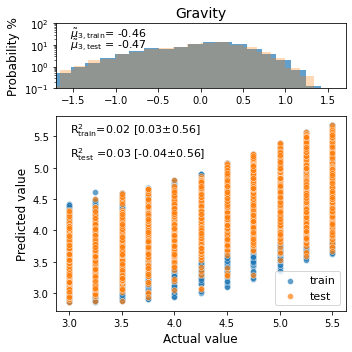

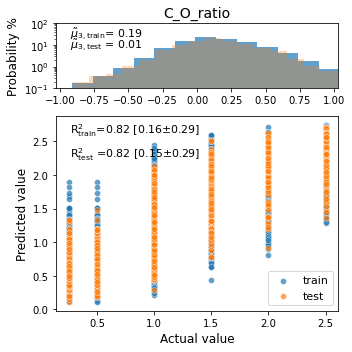

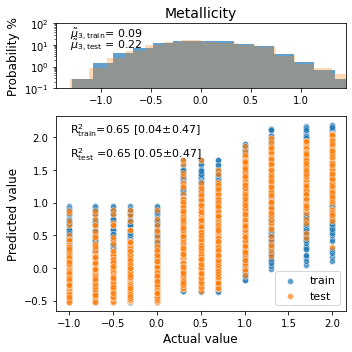

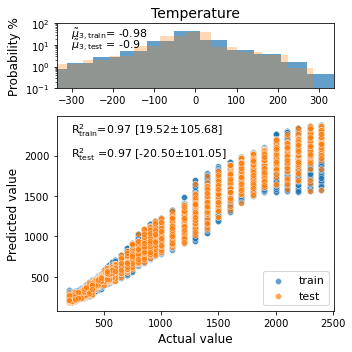

In [36]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )